<a href="https://colab.research.google.com/github/mackiie/Deep-Learning-Report/blob/main/Drinking_Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [2]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [3]:
# !kaggle datasets download -d arkadiyhacks/drinking-waste-classification

100% 1.49G/1.50G [00:16<00:00, 88.9MB/s]
100% 1.50G/1.50G [00:16<00:00, 99.8MB/s]


In [4]:
# !unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images_of_Waste/YOLO_imgs/PET931.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET932.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET932.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET933.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET933.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET934.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET934.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET935.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET935.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET936.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET936.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET938.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET938.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET940.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET940.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET941.jpg  
  inflating: Images_of_Waste/YOLO_imgs/PET941.txt  
  inflating: Images_of_Waste/YOLO_imgs/PET942.jpg  
  inflating: 

In [5]:
!ls

drinking-waste-classification.zip  Images_of_Waste  kaggle.json


In [6]:
%cd Images_of_Waste

/content/drive/My Drive/Kaggle/Images_of_Waste


In [7]:
!ls

rawimgs  YOLO_imgs


In [8]:
import os

for root, dirs, files in os.walk("OCT2017"):
    print(f"There are {len(dirs)} directories and {len(files)} files in {root}")

In [9]:
import os

for root, dirs, files in os.walk("rawimgs"):
    print(f"There are {len(dirs)} directories and {len(files)} files in {root}")

There are 4 directories and 0 files in rawimgs
There are 0 directories and 1060 files in rawimgs/AluCan
There are 0 directories and 1232 files in rawimgs/Glass
There are 0 directories and 1028 files in rawimgs/HDPEM
There are 0 directories and 1508 files in rawimgs/PET


In [10]:
train_dir = "rawimgs"

In [11]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 4820 files belonging to 4 classes.


In [12]:
import random
import matplotlib.pyplot as plt

def plot_random_image(directory, class_names):
    """
    To plot 1 random image from all the classes of the directory specified
    """

    plt.figure(figsize=(10,10))

    total = len(class_names)
    for i in range(total):
        image_path = directory + "/" + class_names[i]
        random_image = random.sample(os.listdir(image_path), 1)
        image_path = image_path + "/" + random_image[0]
        image = plt.imread(image_path)

        plt.subplot(1, total, (i+1))
        plt.imshow(image, cmap="gray")
        plt.axis(False)
        plt.title(f"{class_names[i]}", fontsize=20)

In [13]:
import numpy as np

class_names = np.array(sorted(os.listdir(train_dir)))
class_names

array(['AluCan', 'Glass', 'HDPEM', 'PET'], dtype='<U6')

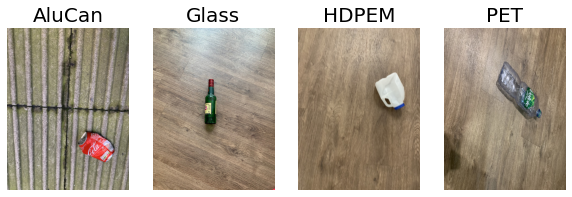

In [14]:
plot_random_image(directory = train_dir, class_names = class_names)

In [15]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [17]:
base_model = tf.keras.applications.vgg16.VGG16(include_top=False)
base_model.trainable=False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = base_model(inputs, training=False) #Put the base model in inference mode, and so weights ehich remains frozen, remains frozen
x = layers.Conv2D(64, (3, 3), activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(100, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

58900480/58889256 [==============================] - 1s 0us/step


In [18]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics = ["accuracy"])

In [19]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 5, 5, 64)          294976    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               160100    
_________________________________________________________________
output_layer (Dense)         (None, 4)                 404       
Total params: 15,170,168
Trainable params: 455,480
Non-trainable params: 14,714,688
_________________________________________

In [20]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [21]:
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data)
                    )

Epoch 1/10
151/151 [==============================] - 84s 281ms/step - loss: 2.7809 - accuracy: 0.5950
Epoch 2/10
151/151 [==============================] - 37s 239ms/step - loss: 0.3500 - accuracy: 0.9027
Epoch 3/10
151/151 [==============================] - 37s 238ms/step - loss: 0.0643 - accuracy: 0.9830
Epoch 4/10
151/151 [==============================] - 37s 238ms/step - loss: 0.0162 - accuracy: 0.9981
Epoch 5/10
151/151 [==============================] - 37s 238ms/step - loss: 0.0073 - accuracy: 0.9996
Epoch 6/10
151/151 [==============================] - 37s 238ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 7/10
151/151 [==============================] - 37s 237ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/10
151/151 [==============================] - 37s 239ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/10
151/151 [==============================] - 37s 240ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/10
151/151 [==============================] - 37s 239ms/step - l

In [22]:
model.save("Muskaan_Drinking_Waste")

INFO:tensorflow:Assets written to: Muskaan_Drinking_Waste/assets


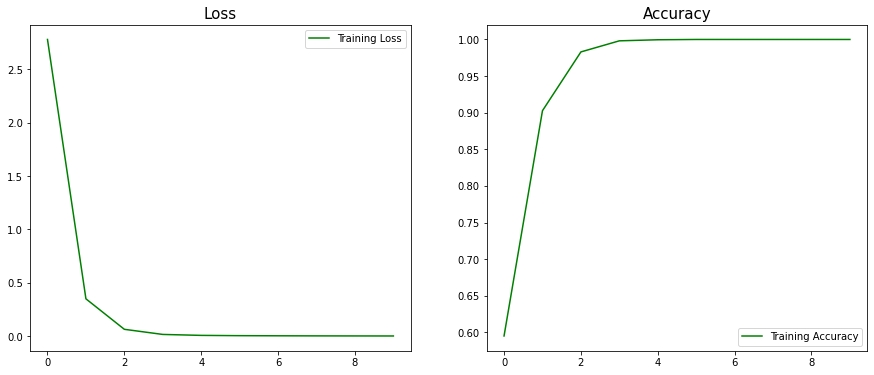

In [23]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]

epochs = range(len(loss))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label = "Training Loss", color='green')

plt.legend()
plt.title("Loss", fontsize=15)

plt.subplot(1,2,2)
plt.plot(epochs, accuracy, label = "Training Accuracy", color='green')

plt.legend()
plt.title("Accuracy", fontsize=15)
plt.show();

In [24]:
pred_probs = model.predict(train_data)
pred_probs

array([[8.64456641e-04, 9.94754259e-07, 9.99134600e-01, 1.63900425e-12],
       [9.99592245e-01, 3.83541454e-04, 1.39616395e-05, 1.02581716e-05],
       [2.16676233e-10, 1.00000000e+00, 4.63199899e-13, 2.53353740e-12],
       ...,
       [2.03050732e-08, 3.37641637e-07, 3.38590579e-11, 9.99999642e-01],
       [1.18669853e-07, 2.52586119e-06, 9.99997020e-01, 3.75859941e-07],
       [1.65179445e-04, 8.98959900e-12, 3.81480909e-08, 9.99834776e-01]],
      dtype=float32)

In [25]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([2, 0, 1, 2, 1, 3, 1, 2, 2, 1])

In [26]:
len(pred_classes)

4820

In [28]:
y_labels = []
for images, labels in train_data.unbatch():
    y_labels.append(labels.numpy().argmax()) # currently test labels are one hot encoded like [0, 0, 0, 1, 0, ...... 0, 0, 0]

y_labels[:10]

[1, 3, 3, 2, 3, 1, 1, 1, 0, 3]

In [29]:
len(y_labels)

4820

In [29]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)

In [30]:
class_names

array(['AluCan', 'Glass', 'HDPEM', 'PET'], dtype='<U6')

In [32]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

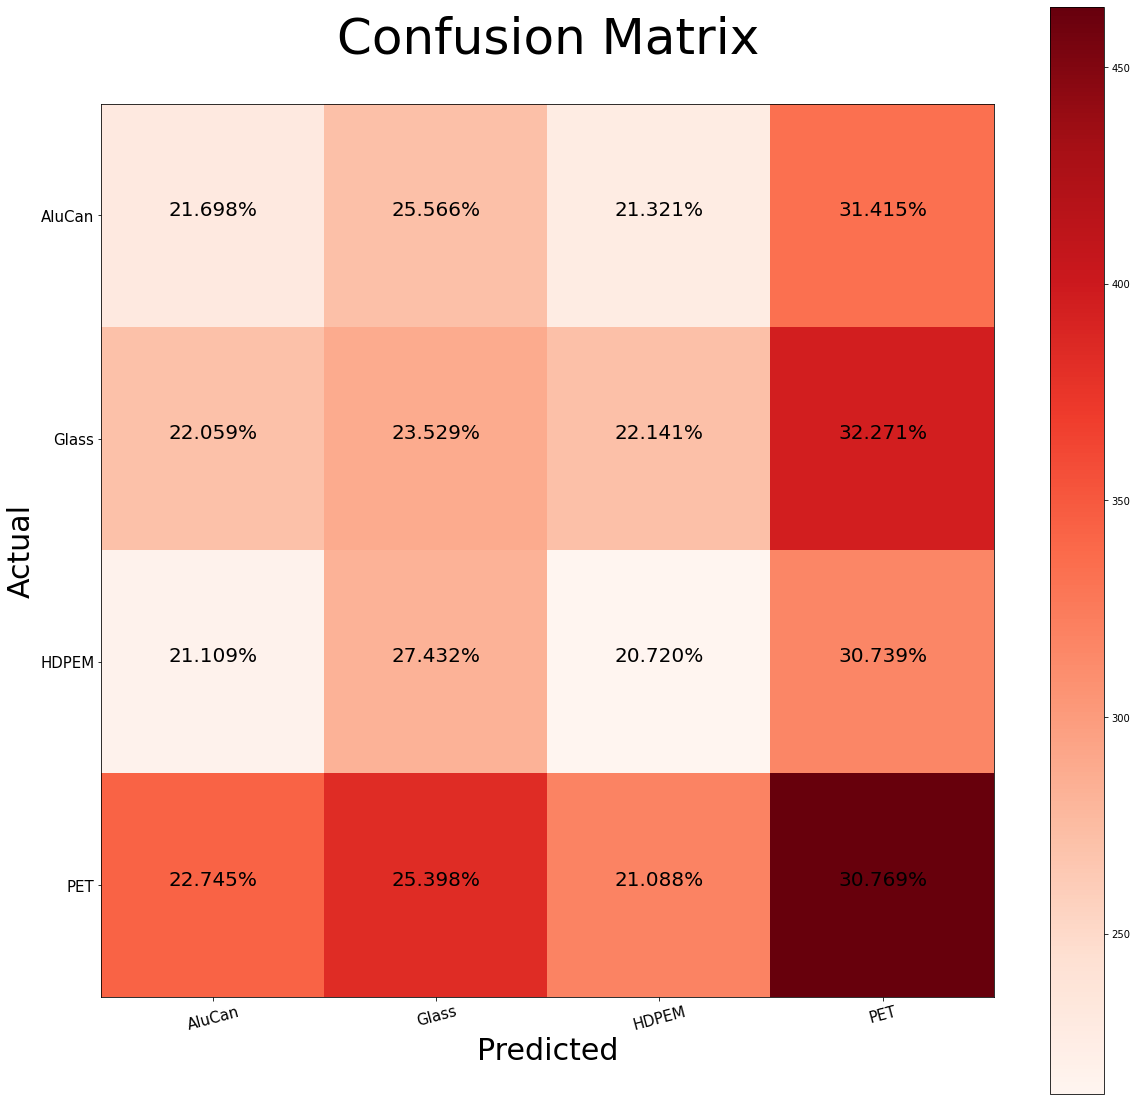

In [33]:
cm = confusion_matrix(y_labels, pred_classes)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0] # find the number of classes we're dealing with

# Plot the figure and make it pretty
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(cm, cmap=plt.cm.Reds) # colors will represent how 'correct' a class is, darker == better
fig.colorbar(cax)

# Are there a list of classes?
labels = class_names

plt.xticks(np.arange(len(class_names)), class_names, rotation=15, fontsize=15)
plt.yticks(np.arange(len(class_names)), class_names, fontsize=15)
plt.xlabel("Predicted", fontsize =30)
ax.xaxis.tick_bottom()
plt.ylabel("Actual", fontsize =30)
plt.title("Confusion Matrix", fontsize=50)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm_norm[i, j]*100:.3f}%",
            horizontalalignment="center",
            color="white" if cm_norm[i, j] > 0.5 else "black",
            size=20)

fig.savefig("confusion_matrix.png")

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.22      0.22      0.22      1060
           1       0.24      0.24      0.24      1224
           2       0.21      0.21      0.21      1028
           3       0.31      0.31      0.31      1508

    accuracy                           0.25      4820
   macro avg       0.24      0.24      0.24      4820
weighted avg       0.25      0.25      0.25      4820



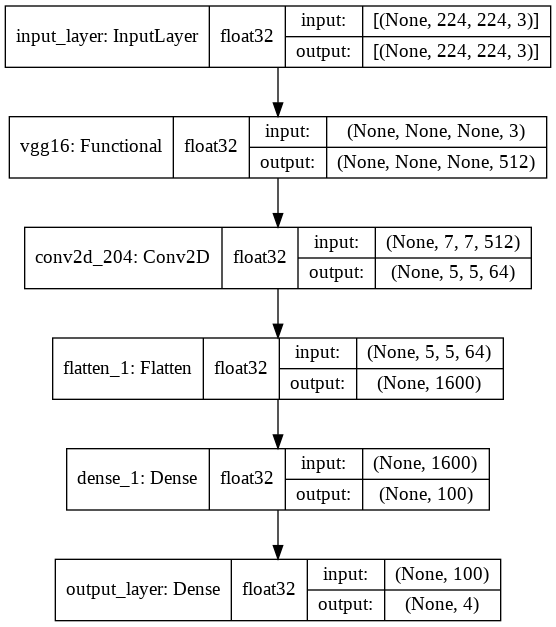

In [36]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

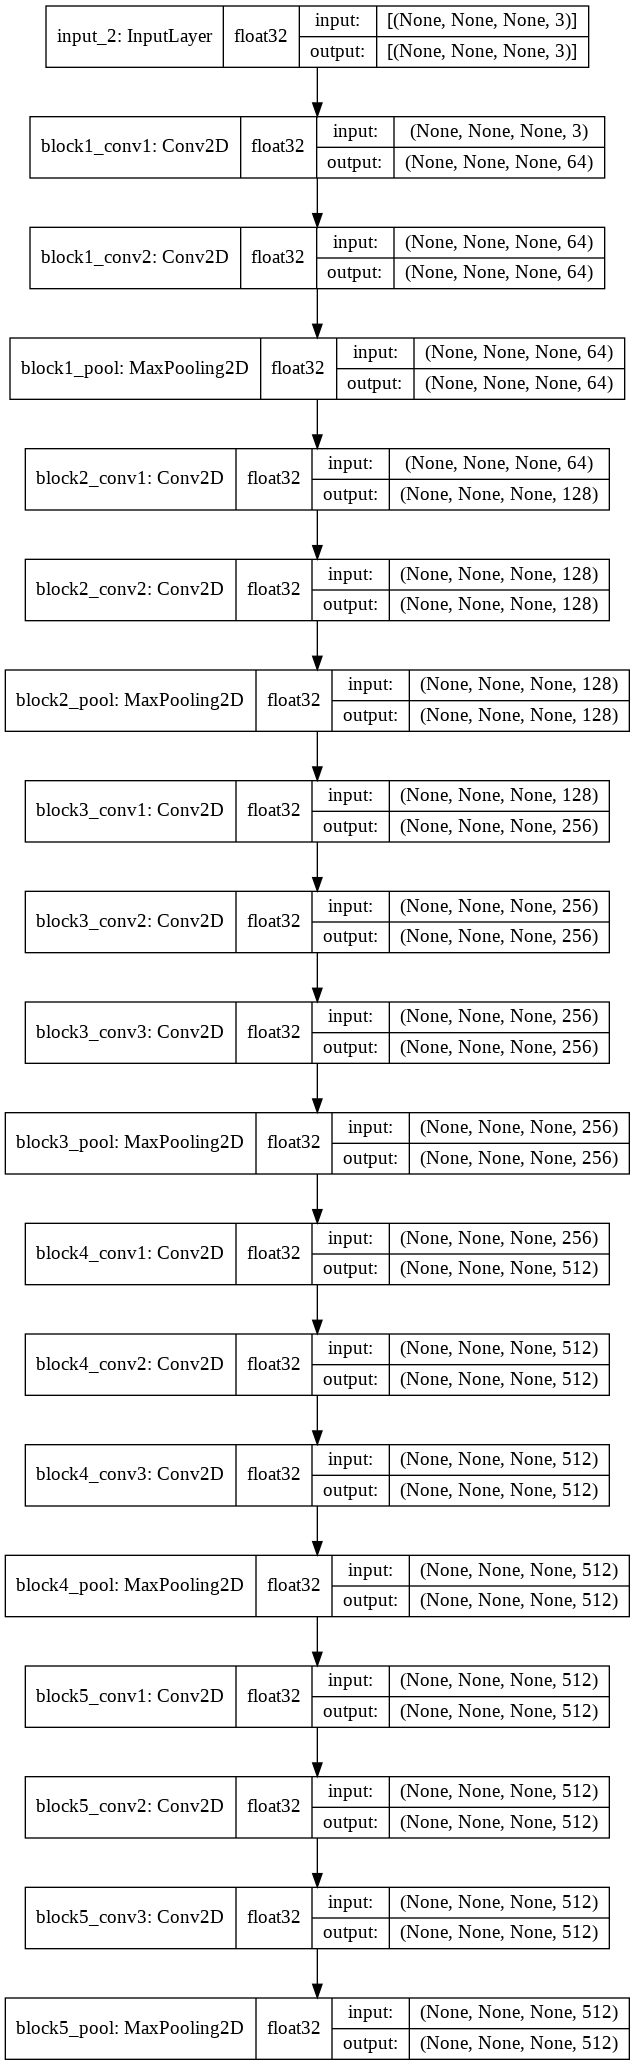

In [37]:
tf.keras.utils.plot_model(
    base_model, to_file='base_model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)